In [1]:
%load_ext autoreload
%autoreload 2
notebook_fixed_dir = False

In [2]:
# this cell can only be called once
import os
if not notebook_fixed_dir:
    os.chdir('..')
    notebook_fixed_dir = True
print(os.getcwd())

/home/svcl-oowl/brandon/research/sil_consistent_at_inference


In [3]:
import pprint
import glob
from pathlib import Path
import pickle
import random

import torch
from PIL import Image
import numpy as np
from pytorch3d.renderer import look_at_view_transform
import matplotlib.pyplot as plt
import trimesh
from tqdm.autonotebook import tqdm
from pytorch3d.io import save_obj
import pandas as pd
import imageio

from utils import general_utils, visualization_tools, nn_pose_est, eval_utils
from evaluation import compute_iou_2d, compute_iou_2d_given_pose, compute_iou_3d, compute_chamfer_L1, sample_points
from utils.brute_force_pose_est import brute_force_estimate_pose, brute_force_estimate_dist
from mesh_refiner import MeshRefiner
from deformation import losses

In [4]:
models_dir_temp = "/home/svcl-oowl/brandon/research/occupancy_networks/out/pytorch3d_renders/{}/generation/meshes/{}.obj"
class_id = "02691156"
instance = "d28a3cd771b2bf1e71d03b466c72ce41"
#model_path = os.path.join(models_dir_temp.format(class_id, instance))
model_path = "notebooks/d28a3cd771b2bf1e71d03b466c72ce41_sym_ex2.obj"
#model_path = "/home/svcl-oowl/dataset/ShapeNetCore.v1/02933112/79a8b5fdd40e1b1d20768660cf080d12/model_watertight.obj"

device = torch.device("cuda:0")
mesh = general_utils.load_untextured_mesh(model_path, device)

In [5]:
sym_plane = [0,0,1]
num_azim = 3
dist = 1.1
sym_loss, sym_triples = losses.image_symmetry_loss(mesh, sym_plane, num_azim, device, render_silhouettes=False, dist=dist)

In [6]:
print(sym_loss)

tensor(0.0070, device='cuda:0')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


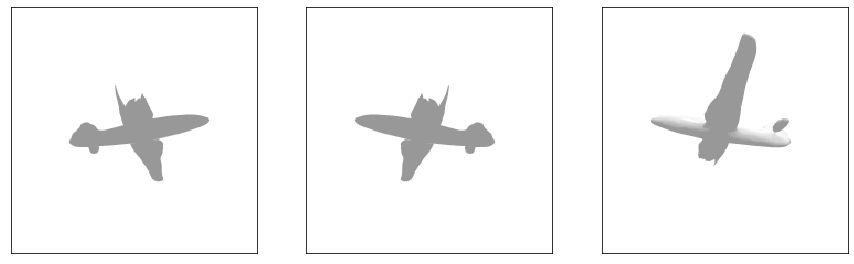

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


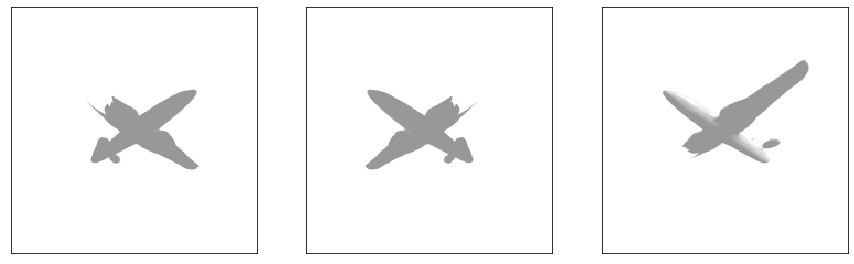

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


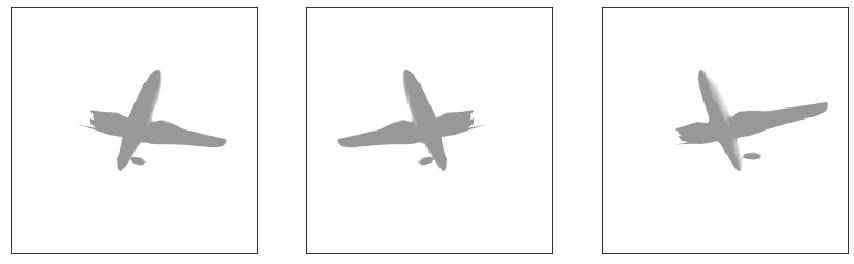

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


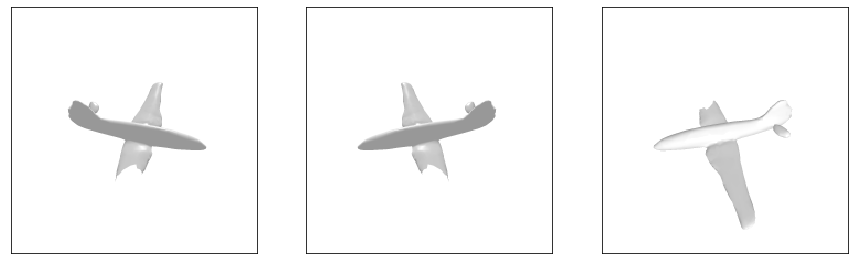

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


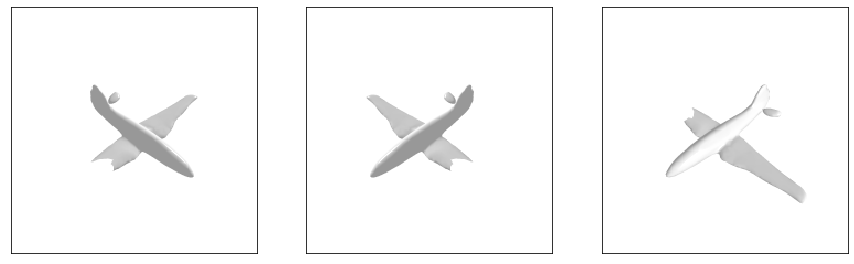

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


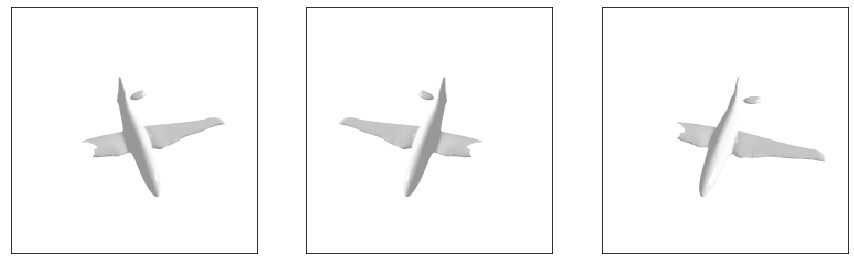

In [6]:
for sym_triple in sym_triples:
    fig, ax = plt.subplots(nrows=1, ncols=3, squeeze=False, figsize=(15,10))
    for i, render in enumerate(sym_triple):
        ax[0][i].imshow(render[..., :3].detach().cpu().numpy())
        ax[0][i].xaxis.set_visible(False)
        ax[0][i].yaxis.set_visible(False)
    plt.show()
    
    